# Skin segmentation

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.metrics import make_scorer, confusion_matrix
from Imbalanced_dataset_utility import *

### Reading the dataset from the txt file and adding the column names

In [2]:
data=pd.read_table('Skin_NonSkin.txt', delimiter = '\t')
data.columns =['B', 'G', 'R', 'Skin']
data.head()

,B,G,R,Skin
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


### The dataset only has numerical columns

In [3]:
# displaying the type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245056 entries, 0 to 245055
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       245056 non-null  int64
 1   G       245056 non-null  int64
 2   R       245056 non-null  int64
 3   Skin    245056 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


# 

### Getting the current imbalance in the dataset

In [5]:
# imbalance method checks for the imbalance in the values passed as parameters

print(imbalance([data["Skin"].value_counts()[1], data["Skin"].value_counts()[0]]))

[20.753623661530426, 79.24637633846957]


# 

### Balancing the dataset

In [6]:
# create_imbalanced_data_for_stars_new balances/imbalances the dataset as per the percentage passed in the first parameter.

data = create_imbalanced_data_for_stars_new(0.5, 4000)
print(imbalance([data["Skin"].value_counts()[1], data["Skin"].value_counts()[0]]))
data["Skin"].value_counts()

[48.79238838741156, 51.20761161258843]


0    4198
1    4000
Name: Skin, dtype: int64

In [7]:
# check if any null values are present in the data

data.isnull().values.any()

False

# 

### Plotting the histograms on all the columns

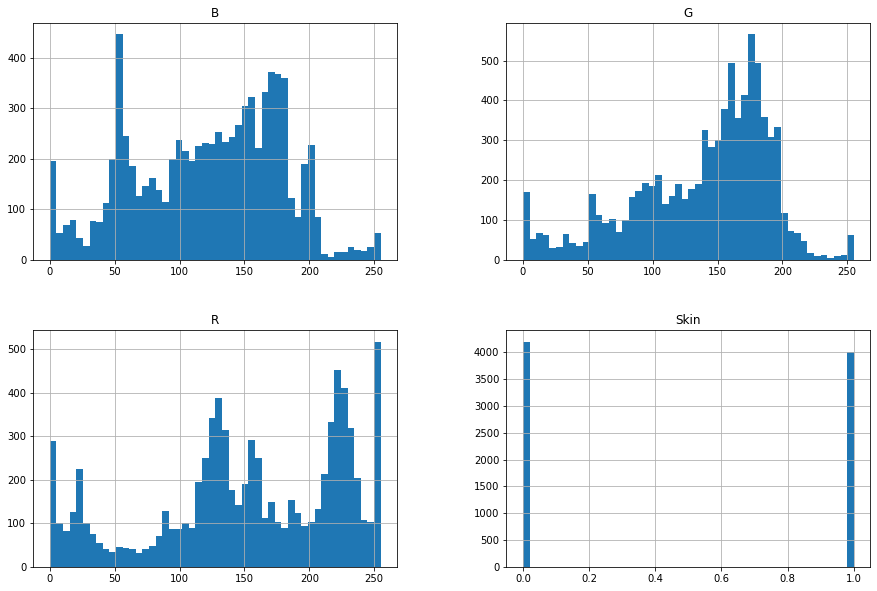

In [8]:

_ = data.hist(bins=50, figsize=(15,10))


### Plotting the heat map for the columns

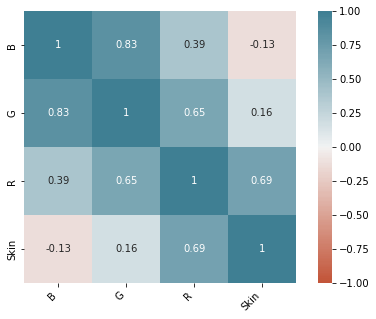

In [9]:


plt.figure(figsize = (8,5))
ax = sn.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
Y_df = data["Skin"]
X_df = data
X_df = X_df.drop("Skin", 1)

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_70517/3609590406.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Skin", 1)


In [11]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(trainX), len(trainY))
print(len(testX), len(testY))

trainY.value_counts()

6558 6558
1640 1640


0    3358
1    3200
Name: Skin, dtype: int64

### Creating a baseline classifier on the original data

In [12]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(trainX), len(trainY))
print(len(testX), len(testY))
print(trainY.value_counts())


base_clf = RandomForestClassifier(n_estimators=700, max_depth=6)

base_scores = cross_val_score(base_clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))


6558 6558
1640 1640
0    3358
1    3200
Name: Skin, dtype: int64
--------------Scores------------
[0.98305085 0.9845679  0.98918083 0.99071207 0.98461538 0.99224806
 0.98765432 0.98159509 0.9845679  0.99224806]
F1 score: 0.99 +/- 0.00


## Skin_NonSkin dataset with low imbalance ( 65% )

In [13]:
# adding imbalance to the dataset

data_imbalanced_1 = create_imbalanced_data_for_stars_new(0.65, 4000)
print(imbalance([data_imbalanced_1["Skin"].value_counts()[1], data_imbalanced_1["Skin"].value_counts()[0]]))
data_imbalanced_1["Skin"].value_counts()

[33.9001732010707, 66.0998267989293]


0    4198
1    2153
Name: Skin, dtype: int64

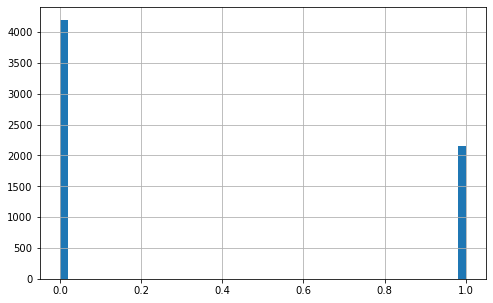

In [14]:
_ = data_imbalanced_1["Skin"].hist(bins=50, figsize=(8,5))

In [15]:
Y_df = data_imbalanced_1["Skin"]
X_df = data_imbalanced_1
X_df = X_df.drop("Skin", 1)

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_70517/4036163672.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Skin", 1)


### Creating random forest classifier as baseline model on low imbalanced dataset

In [16]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(trainX), len(trainY))
print(len(testX), len(testY))
trainY.value_counts()

base_clf = RandomForestClassifier(n_estimators=700, max_depth=6)

base_scores = cross_val_score(base_clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))

5080 5080
1271 1271
--------------Scores------------
[0.97464789 0.97175141 1.         0.98850575 0.97727273 0.99421965
 0.99710145 0.98285714 0.97727273 0.99421965]
F1 score: 0.99 +/- 0.01


# 

### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with low imbalance

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


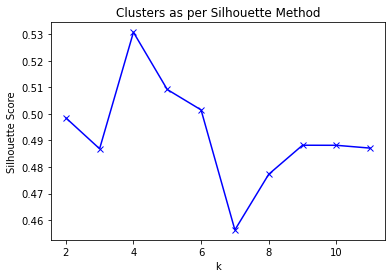

Enter number of clusters for the silhouette graph: 4


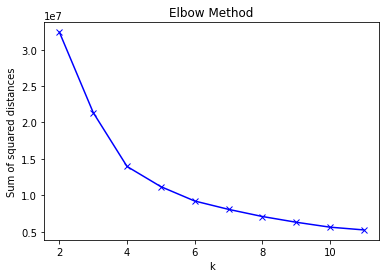

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.20070377155427915 for n_clusters = 4
Run  1  is now complete...
-------------------------------
Run number:  2


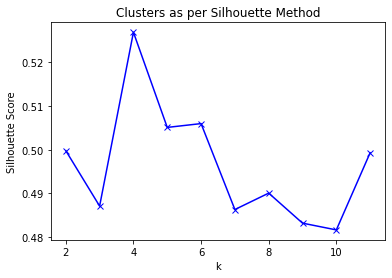

Enter number of clusters for the silhouette graph: 4


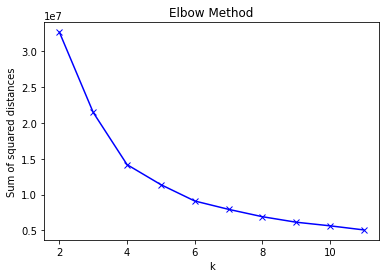

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.020187267574516915 for n_clusters = 4
Run  2  is now complete...
-------------------------------
Run number:  3


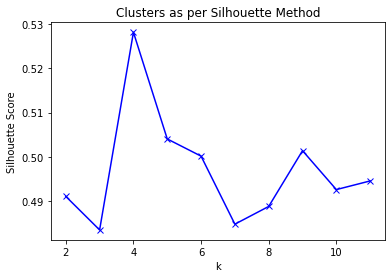

Enter number of clusters for the silhouette graph: 4


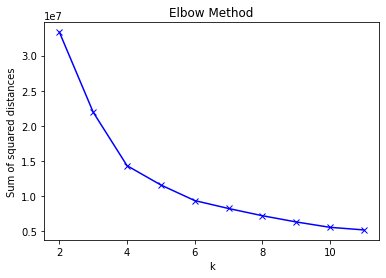

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.01699914744200652 for n_clusters = 4
Run  3  is now complete...
-------------------------------
Run number:  4


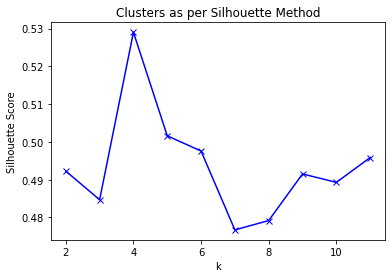

Enter number of clusters for the silhouette graph: 4


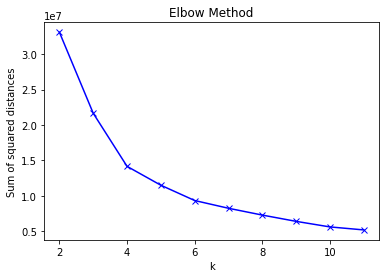

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.09510864103717612 for n_clusters = 4
Run  4  is now complete...
-------------------------------
Run number:  5


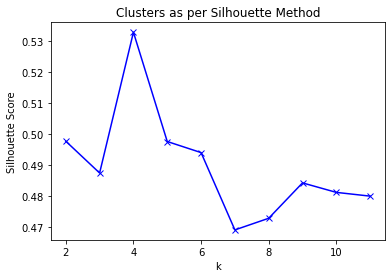

Enter number of clusters for the silhouette graph: 4


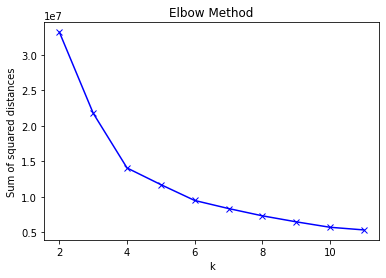

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.01692558800093701 for n_clusters = 4
Run  5  is now complete...
-------------------------------
Run number:  6


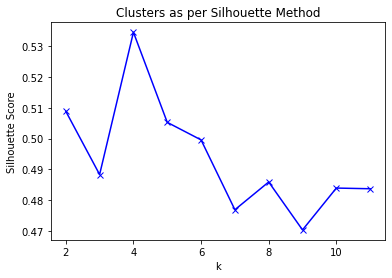

Enter number of clusters for the silhouette graph: 4


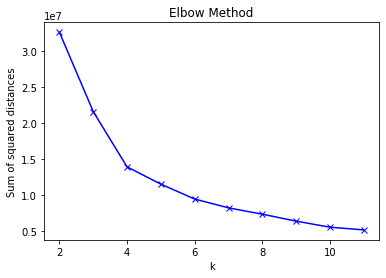

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.01992826003112265 for n_clusters = 4
Run  6  is now complete...
-------------------------------
Run number:  7


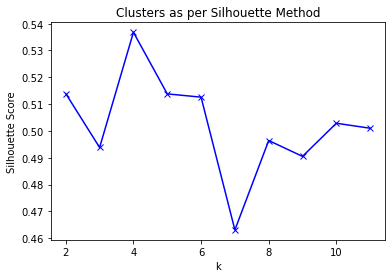

Enter number of clusters for the silhouette graph: 4


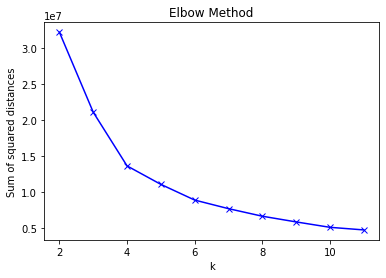

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.09550554809643877 for n_clusters = 4
Run  7  is now complete...
-------------------------------
Run number:  8


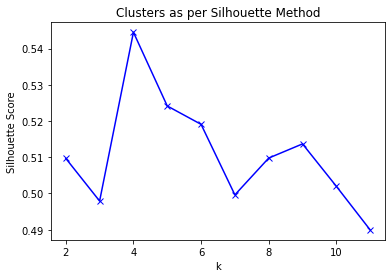

Enter number of clusters for the silhouette graph: 4


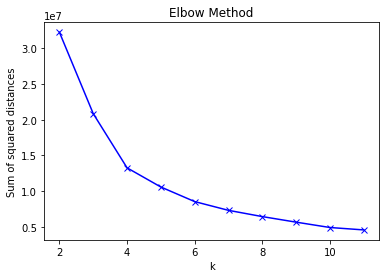

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.28795533282700964 for n_clusters = 4
Run  8  is now complete...
-------------------------------
Run number:  9


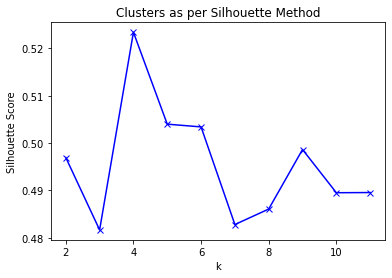

Enter number of clusters for the silhouette graph: 4


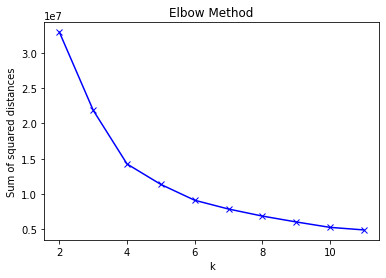

Enter number of clusters for the elbow graph: 5
Best performing clustering F1-score is: 0.01878177195220486 for n_clusters = 4
Run  9  is now complete...
-------------------------------
Run number:  10


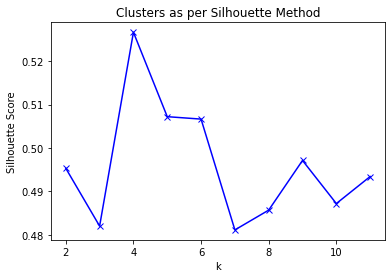

Enter number of clusters for the silhouette graph: 4


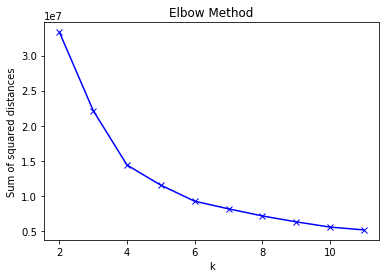

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.29452311331298103 for n_clusters = 4
Run  10  is now complete...
-------------------------------


In [17]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [18]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.7884 +/- 0.0921
PRECISION: 0.8683 +/- 0.0367
ACCURACY: 0.7884 +/- 0.0921
F1: 0.7859 +/- 0.0916


### Box plots comparing the two models

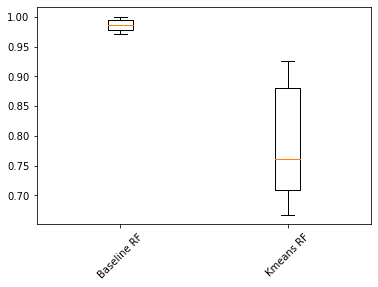

In [19]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()

# 

## Skin_NonSkin dataset with medium imbalance

In [20]:
# adding 75percent imbalance

data_imbalanced_2 = create_imbalanced_data_for_stars_new(0.75, 4000)
print(imbalance([data_imbalanced_2["Skin"].value_counts()[1], data_imbalanced_2["Skin"].value_counts()[0]]))
data_imbalanced_2["Skin"].value_counts()

[24.100524317483277, 75.89947568251672]


0    4198
1    1333
Name: Skin, dtype: int64

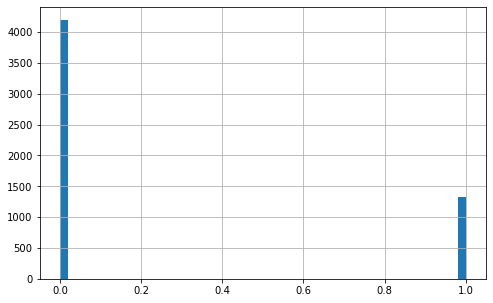

In [21]:
_ = data_imbalanced_2["Skin"].hist(bins=50, figsize=(8,5))

In [22]:
Y_df = data_imbalanced_2["Skin"]
X_df = data_imbalanced_2
X_df = X_df.drop("Skin", 1)

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_70517/1124516197.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Skin", 1)


### Creating a random forest classifier model on dataset with medium imbalance

In [23]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score


# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(trainX), len(trainY))
print(len(testX), len(testY))
trainY.value_counts()

clf2 = RandomForestClassifier(n_estimators=700, max_depth=6)
# dummy_clf = DummyClassifier(strategy='stratified') # generates predictions by respecting the training set's class distribution

base_scores = cross_val_score(clf2, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))


4424 4424
1107 1107
--------------Scores------------
[0.98617512 0.99074074 0.99074074 0.97272727 0.96832579 0.96803653
 0.97247706 0.97222222 0.96803653 0.96774194]
F1 score: 0.98 +/- 0.01


### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with medium imbalance

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


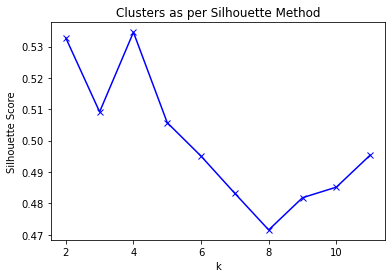

Enter number of clusters for the silhouette graph: 4


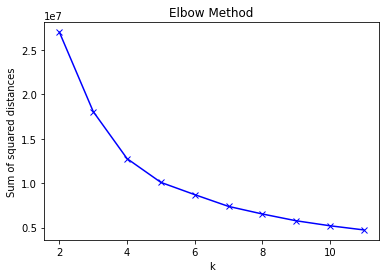

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.15813670646968309 for n_clusters = 4
Run  1  is now complete...
-------------------------------
Run number:  2


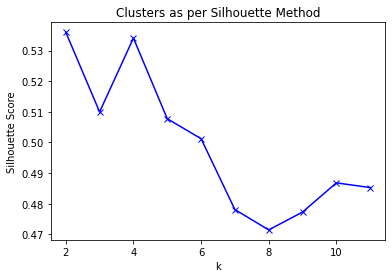

Enter number of clusters for the silhouette graph: 4


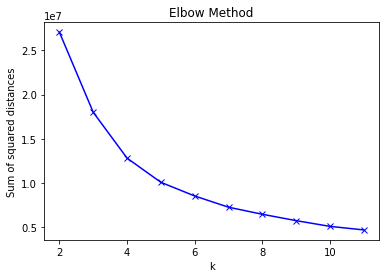

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.011263598117954183 for n_clusters = 4
Run  2  is now complete...
-------------------------------
Run number:  3


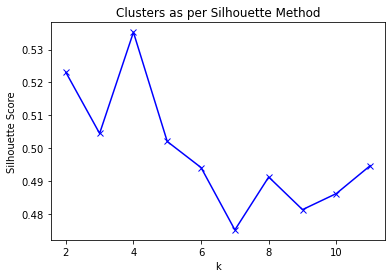

Enter number of clusters for the silhouette graph: 4


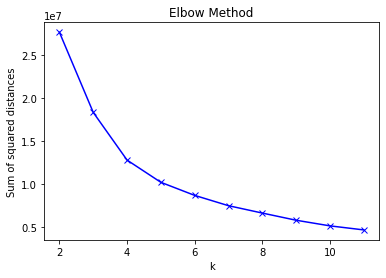

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.47843548741719816 for n_clusters = 4
Run  3  is now complete...
-------------------------------
Run number:  4


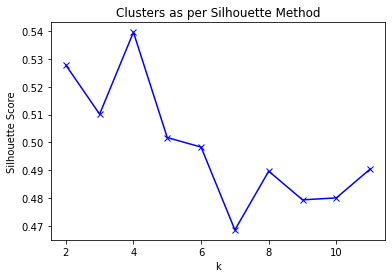

Enter number of clusters for the silhouette graph: 4


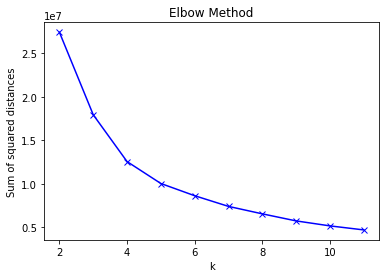

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.38615403262050685 for n_clusters = 4
Run  4  is now complete...
-------------------------------
Run number:  5


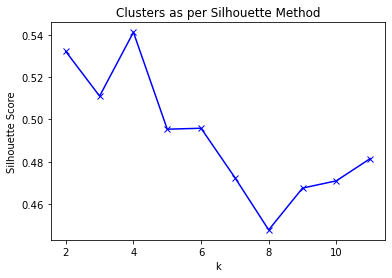

Enter number of clusters for the silhouette graph: 4


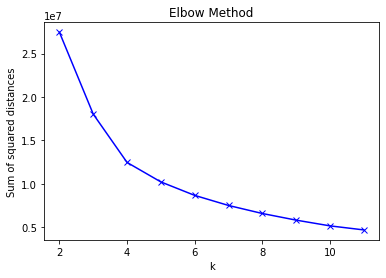

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.017404002359545884 for n_clusters = 4
Run  5  is now complete...
-------------------------------
Run number:  6


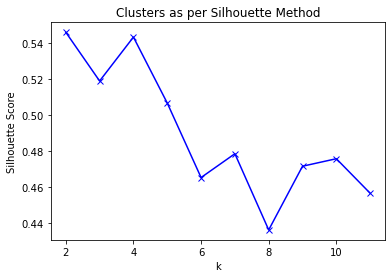

Enter number of clusters for the silhouette graph: 2


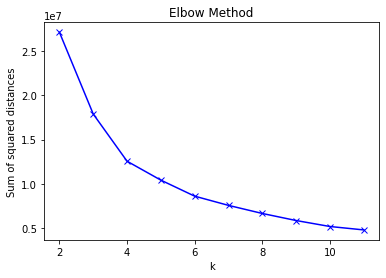

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.4987002229691944 for n_clusters = 2
Run  6  is now complete...
-------------------------------
Run number:  7


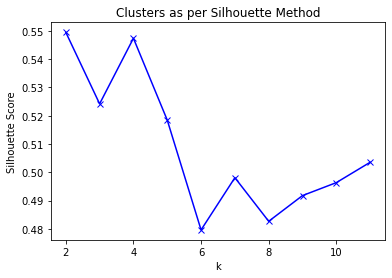

Enter number of clusters for the silhouette graph: 4


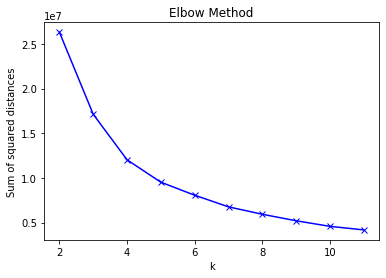

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.010187439802683905 for n_clusters = 4
Run  7  is now complete...
-------------------------------
Run number:  8


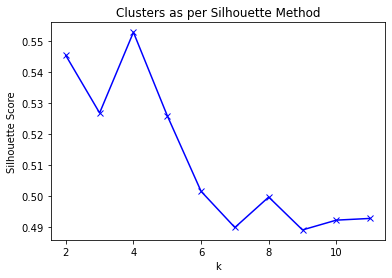

Enter number of clusters for the silhouette graph: 4


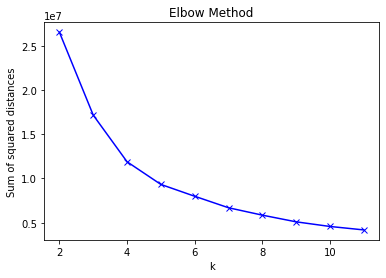

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.01230186361173067 for n_clusters = 4
Run  8  is now complete...
-------------------------------
Run number:  9


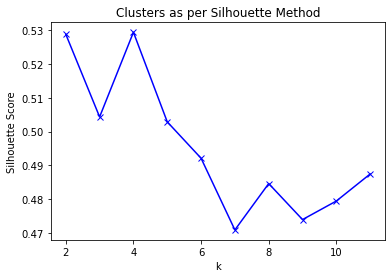

Enter number of clusters for the silhouette graph: 2


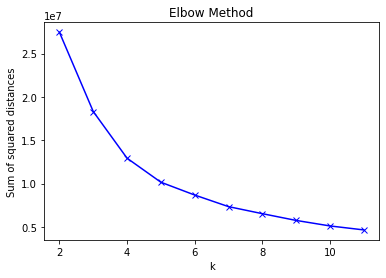

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5143406849403137 for n_clusters = 2
Run  9  is now complete...
-------------------------------
Run number:  10


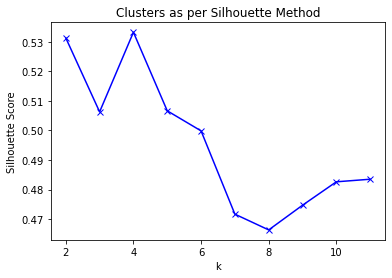

Enter number of clusters for the silhouette graph: 4


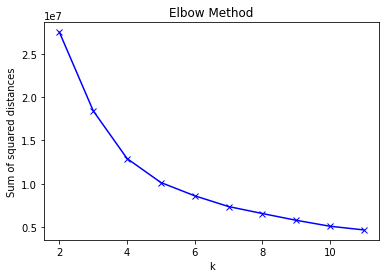

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.32576809533855317 for n_clusters = 4
Run  10  is now complete...
-------------------------------


In [24]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [25]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.4560 +/- 0.2736
PRECISION: 0.9426 +/- 0.0420
ACCURACY: 0.4560 +/- 0.2736
F1: 0.5199 +/- 0.2389


### Box plots comparing the two models

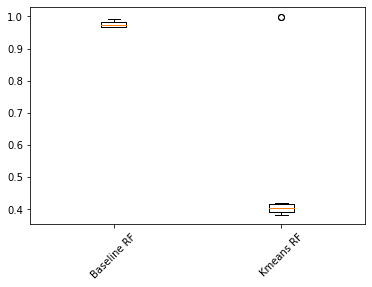

In [26]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()

## Skin_NonSkin dataset with high imbalance

In [31]:
# adding high imbalance to the dataset

data_imbalanced_3 = create_imbalanced_data_for_stars_new(0.9, 4000)
print(imbalance([data_imbalanced_3["Skin"].value_counts()[1], data_imbalanced_3["Skin"].value_counts()[0]]))
data_imbalanced_3["Skin"].value_counts()

[9.56484274019819, 90.43515725980181]


0    4198
1     444
Name: Skin, dtype: int64

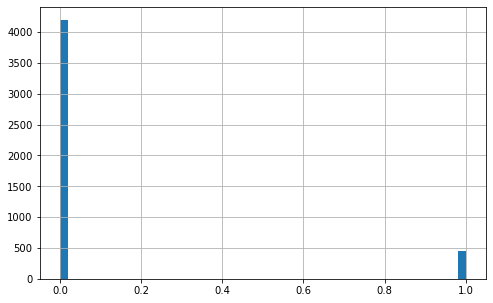

In [32]:
_ = data_imbalanced_3["Skin"].hist(bins=50, figsize=(8,5))

In [33]:
Y_df = data_imbalanced_3["Skin"]
X_df = data_imbalanced_3
X_df = X_df.drop("Skin", 1)

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_70517/3831729676.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Skin", 1)


In [34]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(trainX), len(trainY))
print(len(testX), len(testY))

trainY.value_counts()

3713 3713
929 929


0    3358
1     355
Name: Skin, dtype: int64

# 

### Creating a random forest classifier model on dataset with high imbalance


In [35]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf3 = RandomForestClassifier(n_estimators=700, max_depth=6)
# dummy_clf = DummyClassifier(strategy='stratified') # generates predictions by respecting the training set's class distribution

base_scores = cross_val_score(clf3, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))


--------------Scores------------
[0.93150685 0.95774648 0.98630137 1.         0.95522388 1.
 0.94285714 0.98550725 0.95652174 0.92753623]
F1 score: 0.96 +/- 0.03


# 

### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with high imbalance


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


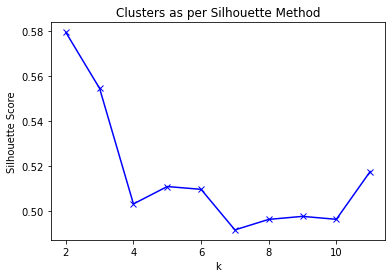

Enter number of clusters for the silhouette graph: 2


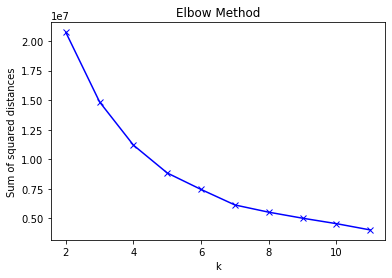

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.3996399802858808 for n_clusters = 3
Run  1  is now complete...
-------------------------------
Run number:  2


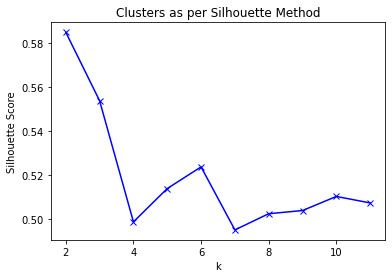

Enter number of clusters for the silhouette graph: 2


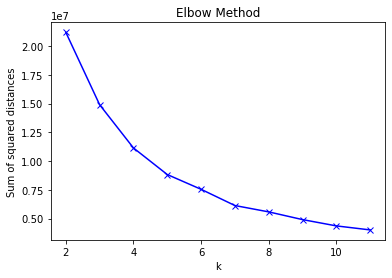

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.5480094355944087 for n_clusters = 2
Run  2  is now complete...
-------------------------------
Run number:  3


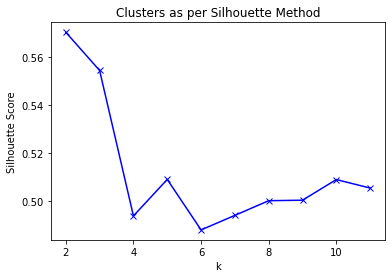

Enter number of clusters for the silhouette graph: 2


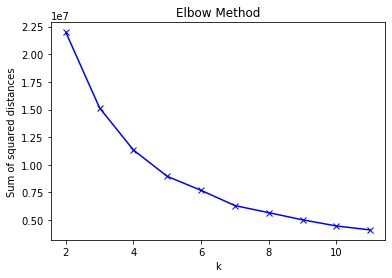

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.5516338148856119 for n_clusters = 2
Run  3  is now complete...
-------------------------------
Run number:  4


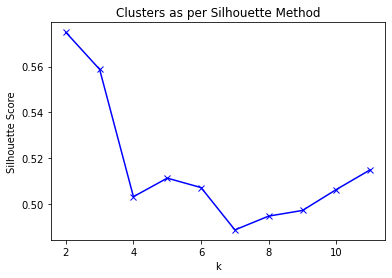

Enter number of clusters for the silhouette graph: 2


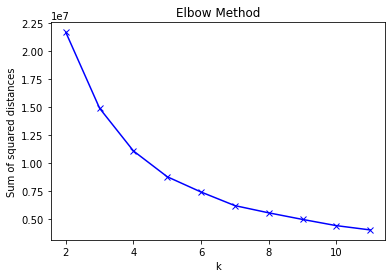

Enter number of clusters for the elbow graph: 2
Best performing clustering F1-score is: 0.5410868875149173 for n_clusters = 2
Run  4  is now complete...
-------------------------------
Run number:  5


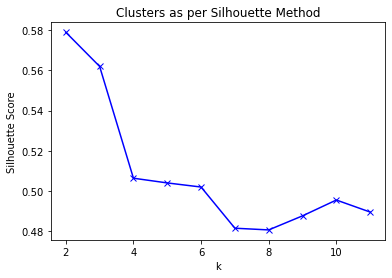

Enter number of clusters for the silhouette graph: 2


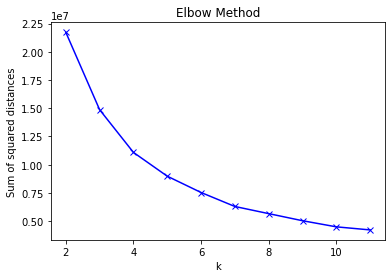

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.5330627933909612 for n_clusters = 2
Run  5  is now complete...
-------------------------------
Run number:  6


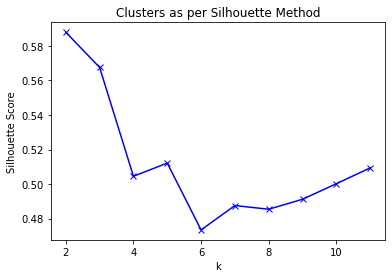

Enter number of clusters for the silhouette graph: 2


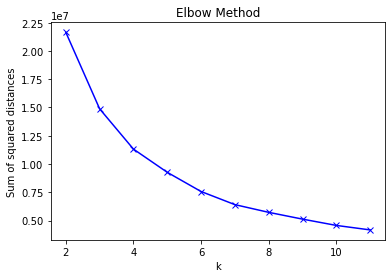

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.505081978060739 for n_clusters = 2
Run  6  is now complete...
-------------------------------
Run number:  7


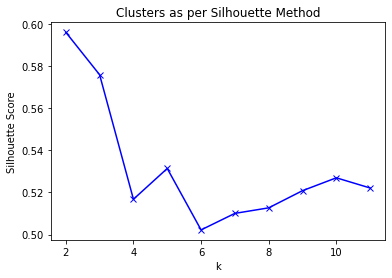

Enter number of clusters for the silhouette graph: 2


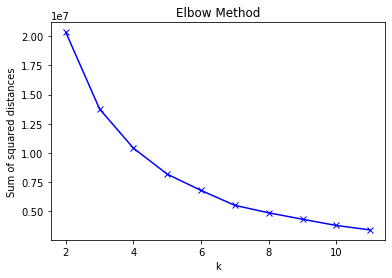

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.504699481284508 for n_clusters = 2
Run  7  is now complete...
-------------------------------
Run number:  8


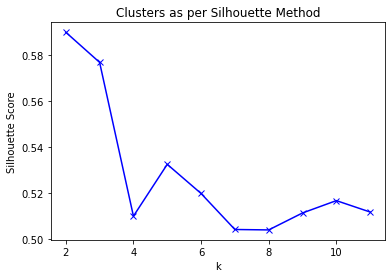

Enter number of clusters for the silhouette graph: 2


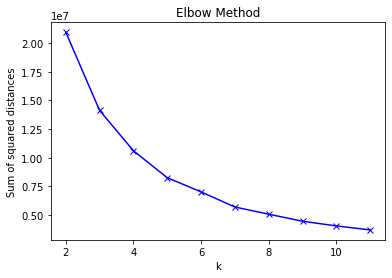

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.5144994871815862 for n_clusters = 2
Run  8  is now complete...
-------------------------------
Run number:  9


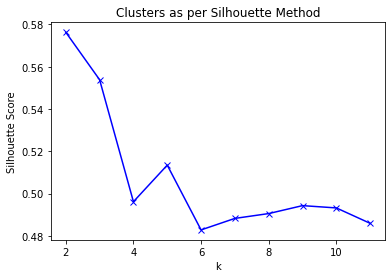

Enter number of clusters for the silhouette graph: 2


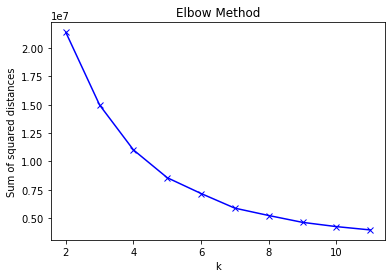

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.41532327337709324 for n_clusters = 3
Run  9  is now complete...
-------------------------------
Run number:  10


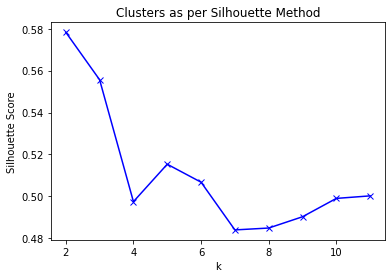

Enter number of clusters for the silhouette graph: 3


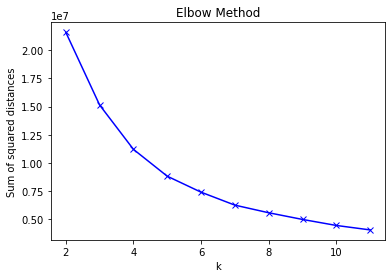

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.2891098815739956 for n_clusters = 4
Run  10  is now complete...
-------------------------------


In [36]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [37]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.9588 +/- 0.1149
PRECISION: 0.9753 +/- 0.0657
ACCURACY: 0.9588 +/- 0.1149
F1: 0.9511 +/- 0.1380


### Box plots comparing the two models

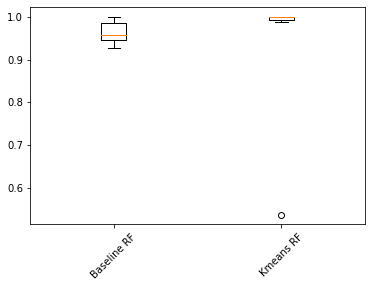

In [38]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()